In [1]:
import sys
sys.path.append("/Users/ishaanroy/Projects/hallucination-detection")

In [2]:
from hallucination_detection.bert_score import BertScore
from hallucination_detection.feature_extractor import FeatureExtractor
from hallucination_detection.bert_attention import AttentionBERT

In [3]:
model_type = None
num_layers = None
scorer = AttentionBERT(model_type, num_layers, lang="en")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
# Define the reference and candidate sentences

reference = ["This is a test sentence"]
candidate = ["The sentence is a test"]

# Compute the BERTScore

output, similarity, attn_weights = scorer.compute_score(candidate, reference)
P, R, F1 = output

# Print the scores
print("Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(P.item(), R.item(), F1.item()))

Precision: 0.15, Recall: 0.25, F1: 0.19


In [19]:
print(f"Similarity: {similarity.shape}")
print(f"Attention: {attn_weights.shape}")

Similarity: torch.Size([1, 7, 7])
Attention: torch.Size([1, 7, 7])


In [20]:
similarity = similarity.numpy().squeeze()
attn_weights = attn_weights.numpy().squeeze()

print(f"Similarity: {similarity.shape}")
print(f"Attention: {attn_weights.shape}")

Similarity: (7, 7)
Attention: (7, 7)


Sim: (5, 5)
Attention: (5, 5)


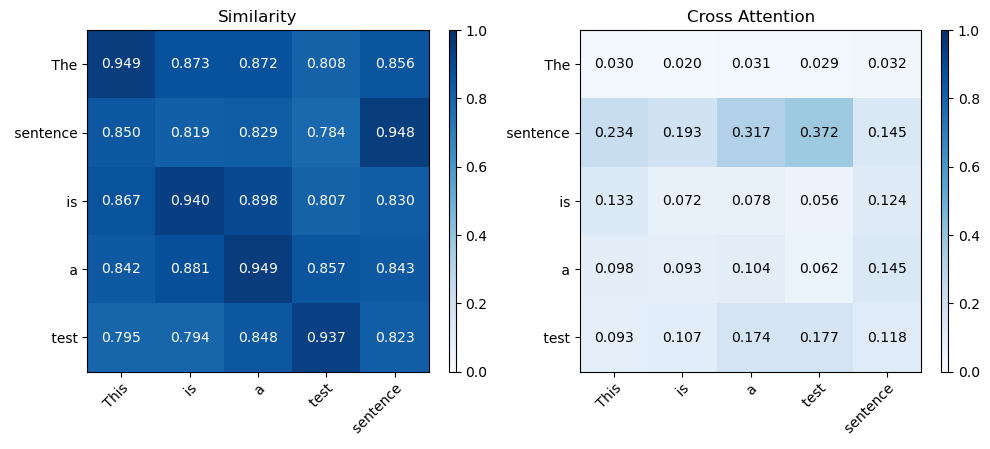

In [21]:
scorer.plot_example(reference=reference[0], candidate=candidate[0], sim=similarity, cross_attention_weights=attn_weights)

In [25]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishaanroy/nltk_data...


True

In [26]:
def semantic_similarity(word1, word2):
    # Calculate semantic similarity score between words based on WordNet
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    
    # Use the maximum similarity score between synsets of both words
    if synsets1 and synsets2:
        max_similarity = max(s1.path_similarity(s2) for s1 in synsets1 for s2 in synsets2)
        return max_similarity if max_similarity is not None else 0.0
    else:
        return 0.0  # Default similarity if no synsets found